In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
file = pd.read_csv('Mall_Customers.csv')
df = pd.DataFrame(file)
print(df)
print(df.columns)
print(type(df.iloc[5, 4]))

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]
Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      

In [3]:
if(df.isnull().values.any()): 
    df = df.groupby('Age').bfill().ffill()
#df.dropna(subset = ['Age'], inplace = True)
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


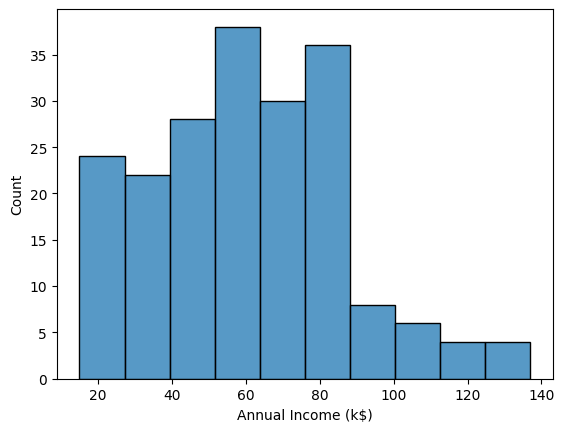

In [4]:
inc_pa = np.array(df['Annual Income (k$)'])
spend_sc = np.array(df['Spending Score (1-100)'])
sb.histplot(df['Annual Income (k$)'])
plt.show()

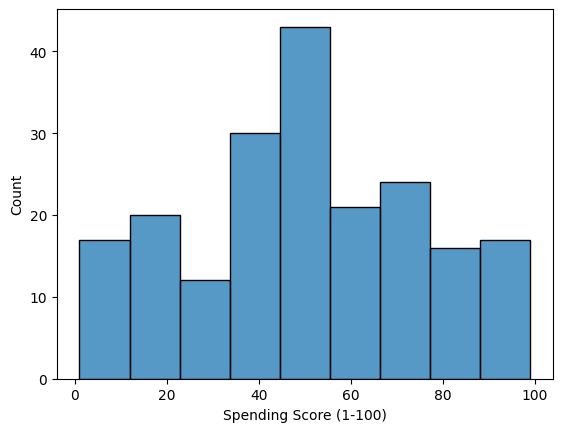

In [5]:
sb.histplot(df['Spending Score (1-100)'])
plt.show()

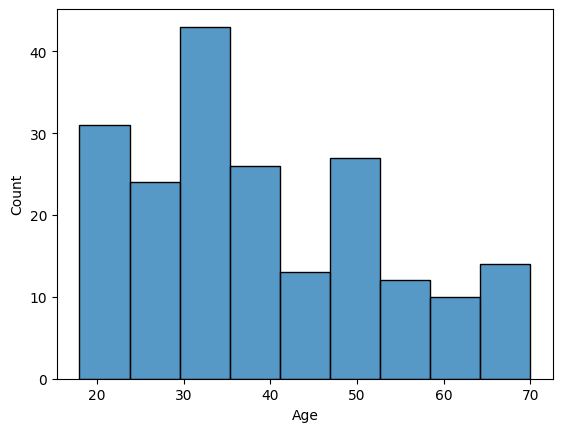

In [6]:
sb.histplot(df['Age'])
plt.show()

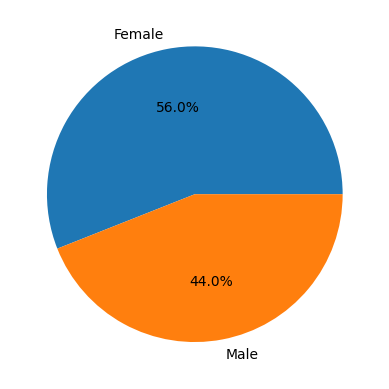

In [7]:
ch = df['Gender'].value_counts()
plt.pie(ch, labels = ch.index, autopct = '%.1f%%')
plt.show()

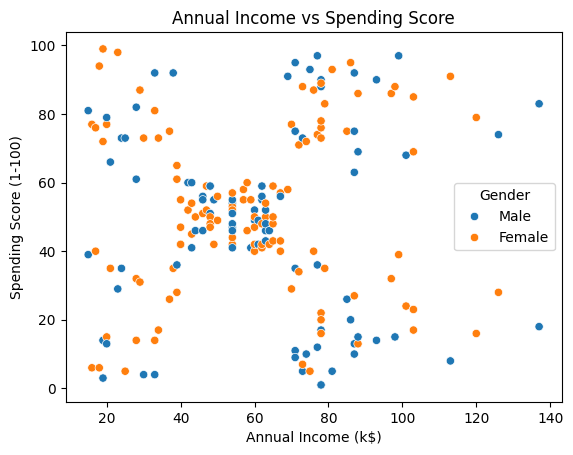

In [8]:
sb.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Annual Income vs Spending Score")
plt.show()

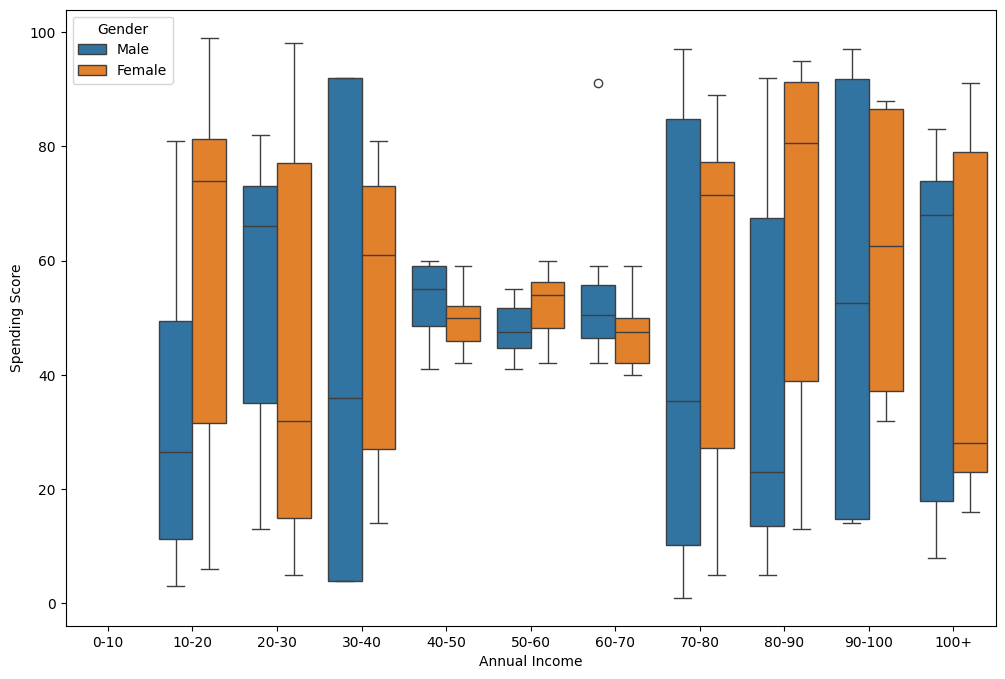

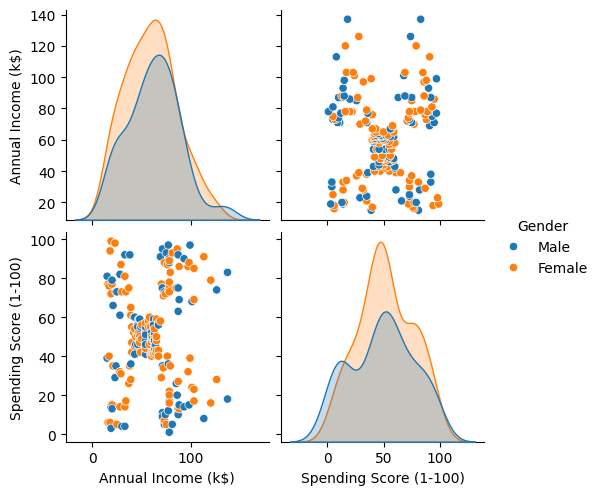

In [9]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, df['Annual Income (k$)'].max() + 1]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80','80-90', '90-100', '100+']
df['income_bin'] = pd.cut(df['Annual Income (k$)'], bins=bins, labels=labels, right = False)
#print(df['Annual Income (k$)'].max())
Q1 = df['Spending Score (1-100)'].quantile(0.25)
Q3 = df['Spending Score (1-100)'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_filtered = df[(df['Spending Score (1-100)'] >= lower_bound) & (df['Spending Score (1-100)'] <= upper_bound)]

plt.figure(figsize = (12, 8))
plt.tight_layout()
sb.boxplot(x = 'income_bin', y = 'Spending Score (1-100)', hue = 'Gender', data = df_filtered)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

df_temp = pd.concat([df['Annual Income (k$)'], df['Spending Score (1-100)'], df['Gender']], axis = 1)
df_pplot = pd.DataFrame(df_temp)
sb.pairplot(df_pplot, hue = 'Gender')
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)
encoded_gender = ohe.fit_transform(df[['Gender']])
gender_df = pd.DataFrame(encoded_gender.astype(int), columns = ohe.get_feature_names_out(['Gender']))
df_encoded = pd.concat([df, gender_df], axis = 1)
print(df_encoded)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

    income_bin  Gender_Female  Gender_Male  
0        10-20              0            1

In [17]:
test_arr1 = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Female', 'Gender_Male']]
test_arr = df_encoded[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
print(test_arr)

kmeans = KMeans(n_clusters = 10, random_state = 42)
kmeans.fit(test_arr)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
print(centers)
df['Clusters'] = kmeans.predict(test_arr)

#print(test_arr.corr())
print(test_arr1.corr())

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]
[[ 56.34090909  53.70454545  49.38636364]
 [ 33.         114.71428571  78.42857143]
 [ 33.26666667  77.2         72.26666667]
 [ 41.96        79.64        15.4       ]
 [ 25.52173913  26.30434783  78.56521739]
 [ 37.5         29.33333333  34.58333333]
 [ 26.32352941  57.79411765  48.94117647]
 [ 41.         109.7         22.        ]
 [ 3

0      5
1      4
2      9
3      4
4      5
5      4
6      9
7      4
8      9
9      4
10     9
11     4
12     9
13     4
14     9
15     4
16     5
17     4
18     5
19     4
20     5
21     4
22     9
23     4
24     9
25     4
26     5
27     4
28     5
29     4
30     9
31     4
32     9
33     4
34     9
35     4
36     9
37     4
38     5
39     4
40     0
41     4
42     5
43     4
44     5
45     4
46     0
47     6
48     5
49     5
50     0
51     6
52     6
53     0
54     0
55     0
56     0
57     0
58     6
59     0
60     0
61     6
62     0
63     0
64     0
65     6
66     0
67     0
68     6
69     6
70     0
71     0
72     0
73     0
74     0
75     6
76     0
77     6
78     6
79     0
80     0
81     6
82     0
83     0
84     6
85     0
86     0
87     6
88     6
89     0
90     0
91     6
92     0
93     6
94     6
95     6
96     0
97     6
98     0
99     6
100    6
101    0
102    0
103    6
104    0
105    6
106    0
107    0
108    0
109    0
110    0
1

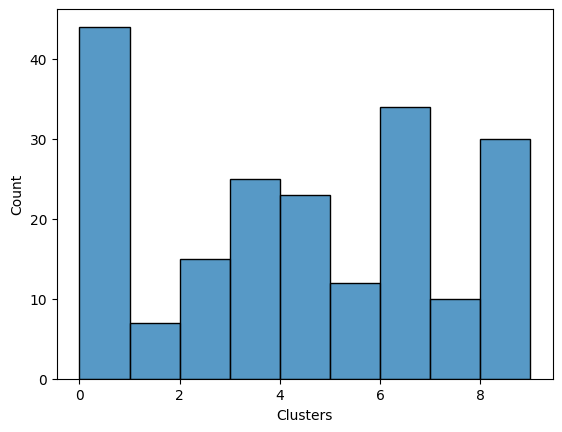

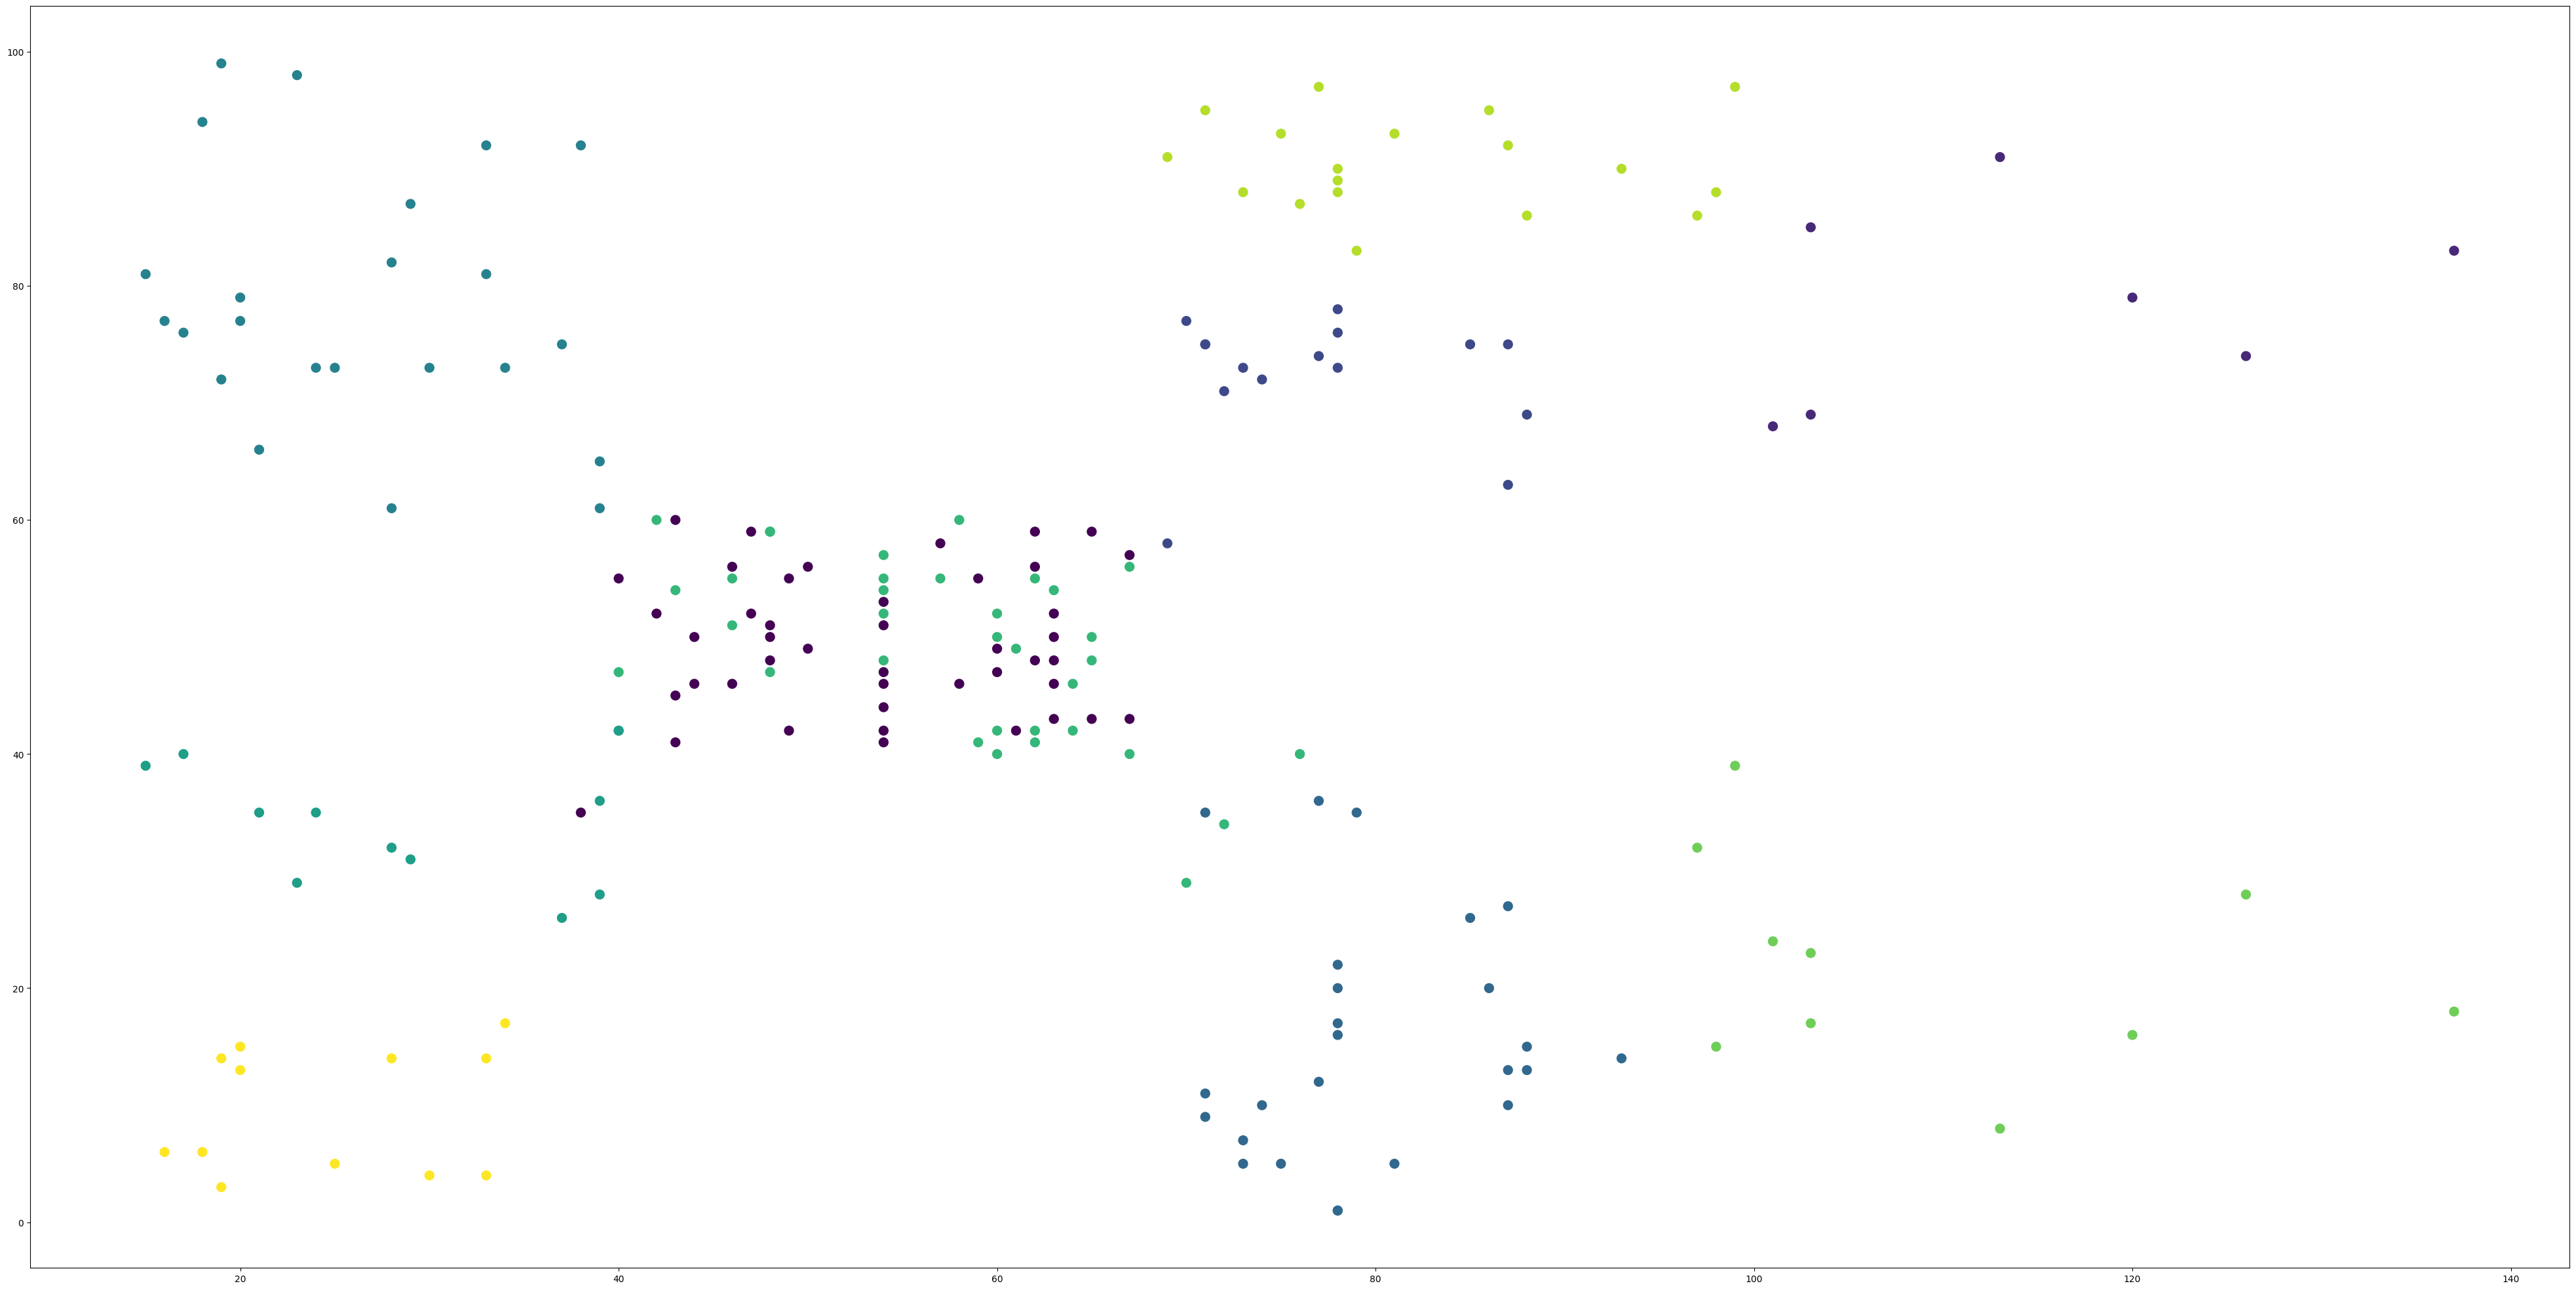

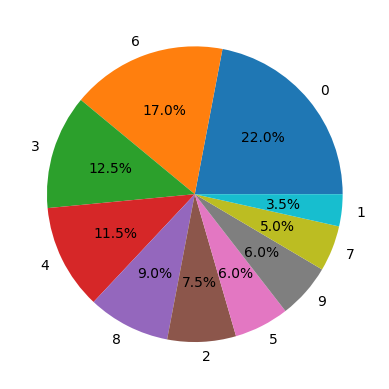

In [20]:
print(df['Clusters'].to_string())
sb.histplot(df['Clusters'])
plt.show()

plt.figure(figsize = (50, 25))
plt.scatter(inc_pa, spend_sc, c = labels, cmap = 'viridis', s = 100)
plt.show()

dt1 = df['Clusters'].value_counts()
plt.pie(dt1, labels = dt1.index, autopct = '%.1f%%')
plt.show()

In [19]:
import joblib
joblib.dump(kmeans, 'cust_segmentation.pkl')

['cust_segmentation.pkl']